In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/train.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/test_x.csv', index_col=0)
submission = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/sample_submission.csv', index_col=0)

In [ ]:
# pycaret을 이용한 AutoML 환경 설정
model = setup(train_data, target = 'voted', use_gpu=True)

,Description,Value
0,session_id,2137
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 77)"
5,Missing Values,False
6,Numeric Features,41
7,Categorical Features,35
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
## 모델 비교

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6930,0.7638,0.6400,0.7622,0.6957,0.3907,0.3969,23.461
lightgbm,Light Gradient Boosting Machine,0.6906,0.7621,0.6459,0.7545,0.6959,0.3848,0.3897,1.413
lda,Linear Discriminant Analysis,0.6896,0.7611,0.6576,0.7463,0.6991,0.3813,0.3846,1.424
ridge,Ridge Classifier,0.6895,0.0000,0.6578,0.7460,0.6991,0.3810,0.3842,0.171
ada,Ada Boost Classifier,0.6887,0.7550,0.6497,0.7493,0.6959,0.3803,0.3844,4.552
et,Extra Trees Classifier,0.6887,0.7581,0.6436,0.7530,0.6939,0.3812,0.3861,10.275
rf,Random Forest Classifier,0.6830,0.7527,0.6342,0.7494,0.6870,0.3704,0.3757,9.028
dt,Decision Tree Classifier,0.6107,0.6068,0.6471,0.6444,0.6457,0.2136,0.2136,1.645
lr,Logistic Regression,0.5482,0.5617,0.9952,0.5486,0.7073,0.0007,0.0041,4.012
knn,K Neighbors Classifier,0.5134,0.5132,0.5538,0.5568,0.5552,0.0182,0.0182,29.641


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2137, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

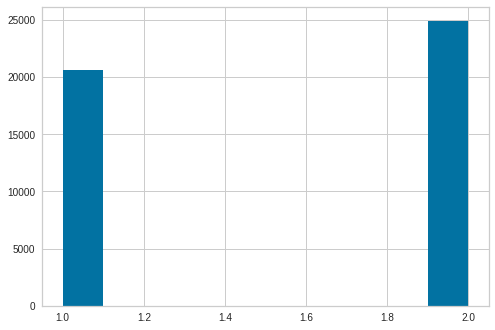

In [ ]:
## 데이터 균형 : 약 4:5

train_data["voted"].hist()

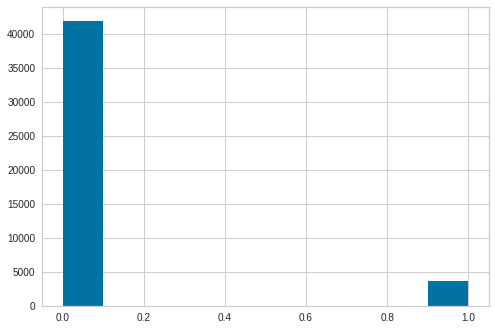

In [ ]:
## 허구 단어
train_data["wf_01"].hist()

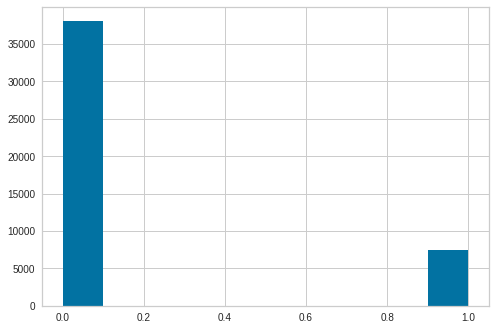

In [ ]:
train_data["wf_02"].hist()

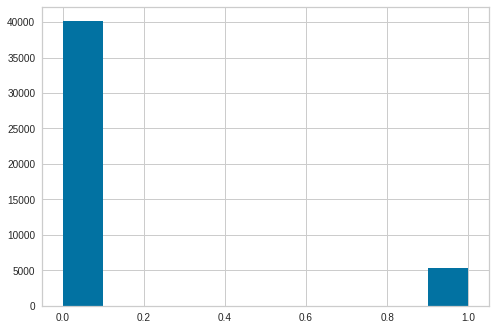

In [ ]:
train_data["wf_03"].hist()

In [ ]:
## 불성실 응답자?

data=train_data[(train_data["wf_01"]==1) | (train_data["wf_02"]==1) | (train_data["wf_03"]==1)]
len(data)

11915

In [ ]:
## model : light gradient boosting, gradient boosting, extra trees

lightgbm = create_model("lightgbm")
# gbc = create_model("gbc")
# et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6888,0.7623,0.6419,0.7540,0.6934,0.3816,0.3868
1,0.6982,0.7677,0.6619,0.7572,0.7063,0.3989,0.4027
2,0.6781,0.7532,0.6344,0.7413,0.6837,0.3599,0.3645
3,0.7019,0.7772,0.6665,0.7604,0.7104,0.4061,0.4098
4,0.6734,0.7556,0.6236,0.7400,0.6768,0.3515,0.3568
5,0.7025,0.7736,0.6590,0.7660,0.7085,0.4083,0.4131
6,0.6931,0.7622,0.6402,0.7623,0.6959,0.3909,0.3970
7,0.6850,0.7503,0.6293,0.7555,0.6866,0.3752,0.3815
8,0.6950,0.7605,0.6550,0.7563,0.7020,0.3930,0.3972
9,0.6897,0.7584,0.6468,0.7523,0.6956,0.3828,0.3873


In [ ]:
tuned_lightgbm = tune_model(lightgbm)   ## tuned model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6904,0.7650,0.6436,0.7555,0.6951,0.3847,0.3898
1,0.6870,0.7573,0.6539,0.7441,0.6961,0.3761,0.3794
2,0.6843,0.7535,0.6430,0.7463,0.6908,0.3720,0.3763
3,0.6988,0.7695,0.6670,0.7552,0.7084,0.3994,0.4027
4,0.6812,0.7573,0.6379,0.7443,0.6870,0.3661,0.3706
5,0.6909,0.7682,0.6585,0.7479,0.7003,0.3839,0.3872
6,0.6928,0.7618,0.6384,0.7628,0.6951,0.3905,0.3968
7,0.6887,0.7514,0.6327,0.7596,0.6904,0.3826,0.3891
8,0.6828,0.7458,0.6459,0.7423,0.6907,0.3683,0.3721
9,0.6881,0.7546,0.6468,0.7498,0.6945,0.3795,0.3838


In [ ]:
## 파라미터 확인
print(lightgbm)
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2137, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
               random_state=2137, reg_alpha=0.005, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


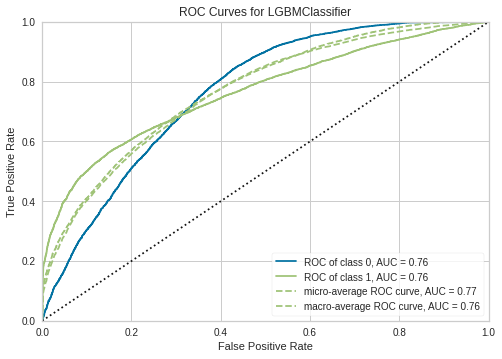

In [ ]:
## Lightgbm ROC curve, AUC

plot_model(tuned_lightgbm)

In [ ]:
## parameter 확인

evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
## parameter 확인

evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=1bb2b8f52ff0fdcda21afb78d0186d4427cd2ad79872f5374cc9323479b66c44
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


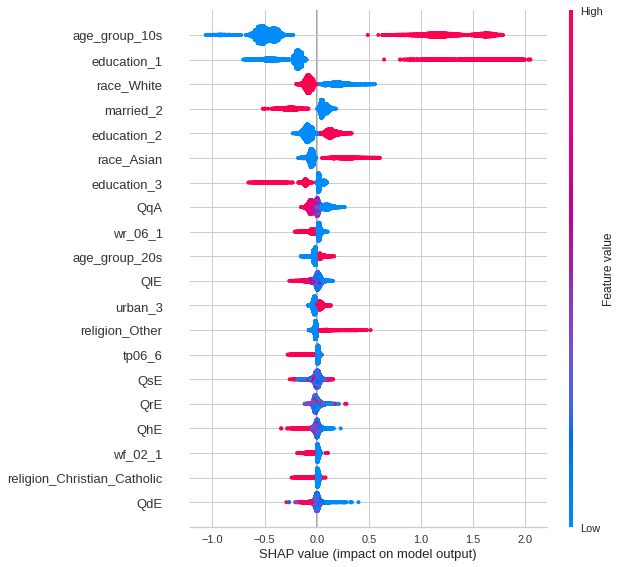

In [ ]:
## shapley value (섀플리 값, 분류에도)

interpret_model(tuned_lightgbm)

## age_group_10s :  10대 이면 투표를 안하는 경향
## education_1   :  고졸 미만이면 투표를 안하는 경향
## race_White    :  백인인 경우 투표를 하는 경향

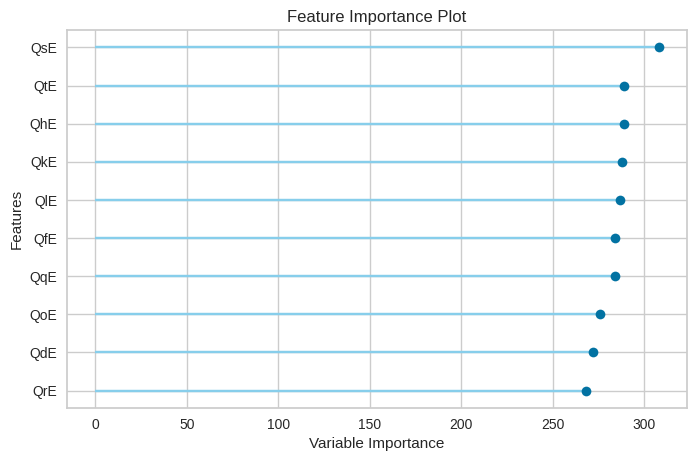

In [ ]:
## feature importance 변수 중요도

plot_model(estimator=tuned_lightgbm, plot="feature")

In [ ]:
## prediction

predictions = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6934,0.7647,0.6493,0.7523,0.697,0.3901,0.3945


In [ ]:
## 모델

finalize_model(tuned_lightgbm)

In [ ]:
## 모델 저장

save_model(tuned_model, "vote_lightgbm")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## 성향, 성격 변수/ 순서형 변수

tp_data = train_data[["tp01","tp02","tp03","tp04","tp05","tp06","tp07","tp08","tp09","tp10"]]

In [ ]:
# 주성분으로 이루어진 데이터 프레임 구성

from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_result = pca.fit_transform(tp_data)
df_pca = pd.DataFrame(data=pca_result, columns = ['principal component1', 'principal component2'])

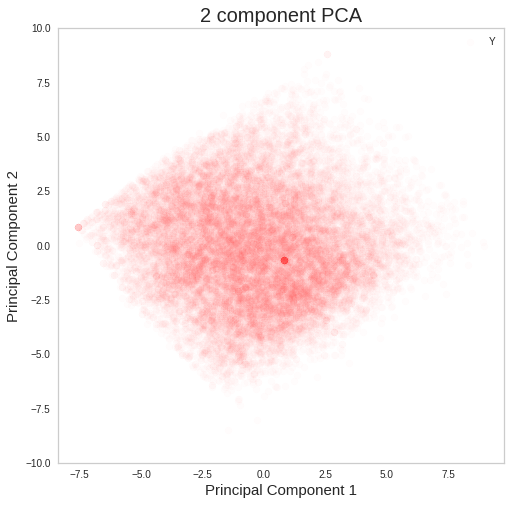

In [ ]:
## 투표자 성향 pca

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [1] # 1, 2
colors = ["red"] # voted, not voted

for target, color in zip(targets,colors):
    indicesToKeep = train_data['voted'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component1']
               , df_pca.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50
               ,alpha =0.01)
 
plt.yscale("linear")
plt.ylim(-10,10)

ax.legend("Y")
ax.grid()

## voted

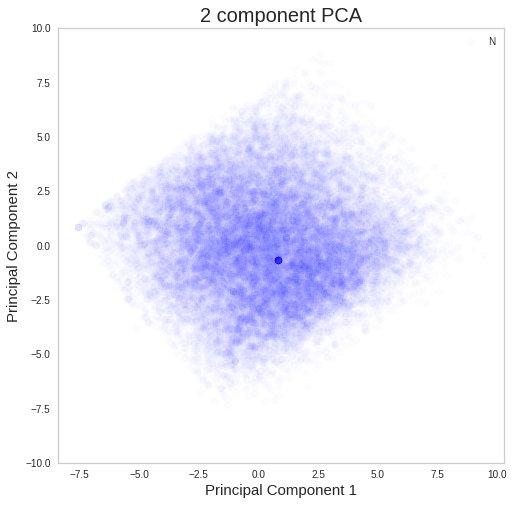

In [ ]:
## 미투표자 성향 pca

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [2] # 1, 2
colors = ["blue"] # voted, not voted

for target, color in zip(targets,colors):
    indicesToKeep = train_data['voted'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component1']
               , df_pca.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50
               ,alpha =0.01)
 
plt.yscale("linear")
plt.ylim(-10,10)

ax.legend("N")
ax.grid()

## not voted